In [124]:
#Importing the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
#Loading a dataset to a pandas dataframe

credit_card_data = pd.read_csv(r"C:\Users\Rupchand Bijwe\Downloads\Credit Card Fraud Detection\creditcard.csv")

In [7]:
#Displaying first five rows of dataset

credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#Displaying Number of rows and columns

credit_card_data.shape

(284807, 31)

In [9]:
#Understanding statistics of numeric columns in dataframe

credit_card_data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#Dataset information

credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
#Checking the number of missing values in each column

credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Distribution of legit transactions & fraudulent transactions

credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### 0 --> Normal Transactions


### 1 --> Fraudulent Transactions

In [13]:
# separating the data for analysis

legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]


In [14]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Data Visualization

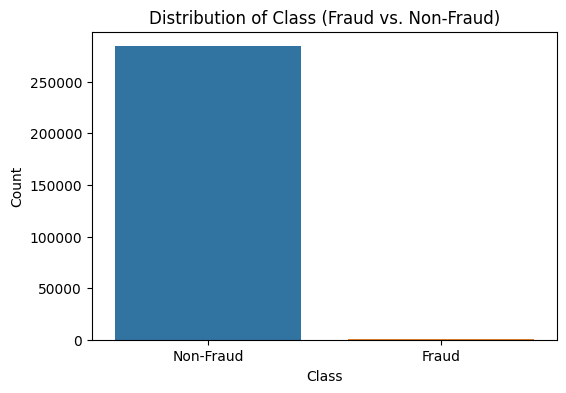

In [15]:
# Custom labels for the classes
class_labels = {0: 'Non-Fraud', 1: 'Fraud'}

# Distribution of Class (Fraud vs. Non-Fraud)
plt.figure(figsize=(6, 4))
sns.countplot(data=credit_card_data, x='Class')
plt.title('Distribution of Class (Fraud vs. Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=[class_labels[0], class_labels[1]])  # Custom labels for the x-axis
plt.show()

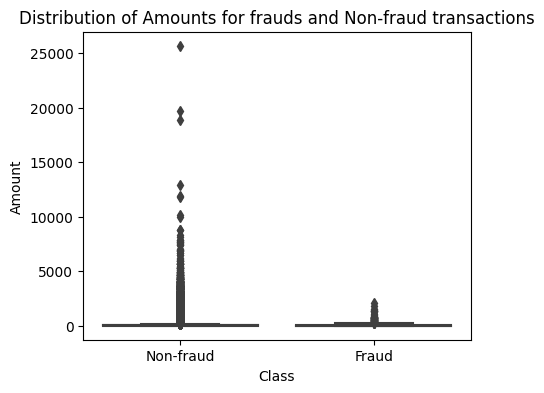

In [16]:
#Custom labels for class
class_labels = {0:'Non-fraud' , 1:'Fraud'}

#Distribution of Amounts for Fraud and Non-fraud transactions
plt.figure(figsize=(5,4))
sns.boxplot(x='Class',y='Amount',data=credit_card_data)
plt.title('Distribution of Amounts for frauds and Non-fraud transactions')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=[class_labels[0], class_labels[1]])  # Custom labels for the x-axis
plt.show()

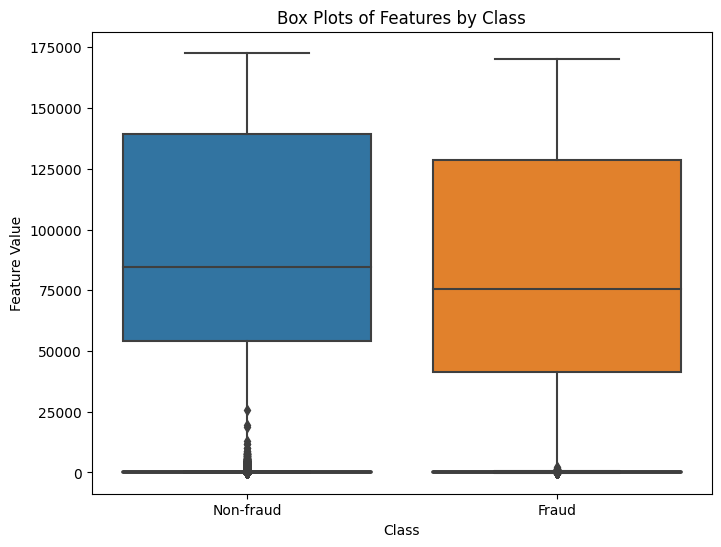

In [17]:
plt.figure(figsize=(8, 6))
for feature in credit_card_data.columns[:-1]:
    sns.boxplot(x='Class', y=feature, data=credit_card_data)
plt.title('Box Plots of Features by Class')
plt.xticks(ticks=[0, 1], labels=[class_labels[0], class_labels[1]])
plt.ylabel('Feature Value')
plt.show()

In [18]:
#Statistical measure of data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under Sampling

### Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

### Number of Fraudulent Transactions --> 492

In [21]:
Legit_Sample=legit.sample(n=492)

In [22]:
#Concatenating two dataframes

New_Dataset = pd.concat([Legit_Sample,fraud],axis=0)

In [23]:
New_Dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
254123,156591.0,2.224940,-1.437849,-2.164650,-1.624293,-0.353133,-0.590790,-0.361755,-0.399637,-1.576114,...,-0.173977,-0.163850,-0.028984,0.097630,0.268312,-0.044697,-0.051989,-0.052847,107.69,0
129881,79232.0,-4.527599,4.330551,-0.855851,-0.833907,-1.026949,-1.281970,0.285918,0.479885,2.552858,...,-0.734729,-1.004617,0.236852,0.282571,0.778840,0.148614,1.870566,1.187083,8.99,0
167729,118858.0,2.035362,-0.154988,-2.958748,-0.576317,2.606883,3.143545,-0.413552,0.783741,0.359607,...,-0.350813,-0.998262,0.361273,0.604955,-0.265481,0.219403,-0.039684,-0.042350,4.49,0
52064,45255.0,0.036500,-2.148326,0.453582,0.680940,-1.505250,0.191417,0.084900,-0.043335,0.705423,...,0.467865,0.235233,-0.530623,0.232622,-0.048369,1.071877,-0.125469,0.116939,600.00,0
3424,2931.0,-0.696918,0.923397,1.565141,0.066874,0.122112,-1.208498,1.016814,-0.517997,0.286198,...,-0.400190,-0.652127,0.116213,0.633051,-0.206914,-0.001360,-0.069727,-0.311270,9.03,0


In [26]:
New_Dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [27]:
New_Dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95237.575203,0.137350,-0.081453,0.081710,0.008455,-0.004912,0.006706,-0.053442,0.018416,-0.029772,...,0.033971,-0.026695,-0.008186,0.002668,0.019705,-0.033732,0.005185,-0.002829,0.010997,89.689512
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting the data into features and targets

In [88]:
x=New_Dataset.drop(columns='Class',axis=1)
y=New_Dataset['Class']

In [101]:
print(x.shape , y.shape)

(984, 30) (984,)


# Splitting the data into Training Data and Testing Data

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=5)

In [114]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(787, 30) (197, 30) (787,) (197,)


# Model Training

# Logistic Regression

In [115]:
model_1 = LogisticRegression(max_iter=1000)

In [116]:
model_1.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

# Using Random Forest Classifier

In [117]:
model_2 = RandomForestClassifier()

In [118]:
model_2.fit(x_train, y_train)

RandomForestClassifier()

# Model Evaluation

In [119]:
#Accuracy on Training data for model_1
x_train_prediction_1 = model_1.predict(x_train)
Training_data_accuracy_1 = accuracy_score(x_train_prediction_1 , y_train)

#Accuracy on Training data for model_2
x_train_prediction_2 = model_2.predict(x_train)
Training_data_accuracy_2 = accuracy_score(x_train_prediction_2 , y_train)

In [120]:
print('Logistic Regression\nAccuracy Score : ' , Training_data_accuracy_1 )
print()
print('Random Forest Classifier\nAccuracy Score : ' , Training_data_accuracy_2 )

Logistic Regression
Accuracy Score :  0.9491740787801779

Random Forest Classifier
Accuracy Score :  1.0


In [121]:
#Accuracy on Testing data for model_1
x_test_prediction_1 = model_1.predict(x_test)
Testing_data_accuracy_1 = accuracy_score(x_test_prediction_1 , y_test)

#Accuracy on Testing data for model_1
x_test_prediction_2 = model_2.predict(x_test)
Testing_data_accuracy_2 = accuracy_score(x_test_prediction_2 , y_test)

In [122]:
print('Logistic Regression\nAccuracy Score : ' , Testing_data_accuracy_1 )
print()
print('Random Forest Classifier\nAccuracy Score : ' , Testing_data_accuracy_2 )

Logistic Regression
Accuracy Score :  0.9390862944162437

Random Forest Classifier
Accuracy Score :  0.934010152284264


In [123]:
print('Logistic Regression Performance ')
print(classification_report(x_test_prediction_1 , y_test))
print()
print('Random Forest Classifier Performance ')
print(classification_report(x_test_prediction_2 , y_test))

Logistic Regression Performance 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       104
           1       0.91      0.97      0.94        93

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197


Random Forest Classifier Performance 
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       107
           1       0.89      0.98      0.93        90

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197

